# Parkinson Disease Classification Dataset

## Optimization and Baseline Model Creation

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
## Optimization and Baseline Model Creation# Import necessary libraries
import pandas as pd
import numpy as np


# Replace with the correct file path
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/pd_speech_features.csv'
data = pd.read_csv(file_path, header=1)

# Display the first few rows of the dataset to verify
print("Dataset Loaded:")
print(data.head())

# Check the shape of the dataset (rows, columns)
print("\nShape of the dataset:", data.shape)

# Display basic info about the dataset
print("\nDataset Info:")
print(data.info())

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Dataset Loaded:
   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.610

In [29]:
# View the column names in the dataset
print("Column names in the dataset:")
print(data.columns)

# View unique values in the target variable ('class')
print("\nUnique values in the target variable:")
print(data['class'].unique())


Column names in the dataset:
Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

Unique values in the target variable:
[1 0]


In [30]:
# Step 1: Check the data types of each column
print("\nData types of the columns:")
print(data.dtypes)

# Step 2: Select only the numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Step 3: Apply mean only to numeric columns
data_cleaned = data.copy()  # Create a copy to avoid modifying the original dataset

# Handle missing values only in numeric columns (you can drop missing or fill with mean)
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Verify that there are no more missing values in numeric columns
print("\nMissing values after cleaning in numeric columns:")
print(data_cleaned[numeric_columns].isnull().sum())




Data types of the columns:
id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

Missing values after cleaning in numeric columns:
id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [31]:
# Check for duplicates# Check for duplicates
duplicate_count = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Verify removal
print(f"\nShape after removing duplicates: {data_cleaned.shape}")

duplicate_count = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Verify removal
print(f"\nShape after removing duplicates: {data_cleaned.shape}")


Number of duplicate rows: 1

Shape after removing duplicates: (755, 755)

Number of duplicate rows: 0

Shape after removing duplicates: (755, 755)


In [32]:
import numpy as np

# Use Z-score to identify outliers
from scipy import stats
z_scores = np.abs(stats.zscore(data_cleaned.select_dtypes(include=[np.number])))

# Define a threshold to identify outliers (commonly, Z-score > 3 is considered an outlier)
outliers = (z_scores > 3).sum(axis=0)

print("\nNumber of outliers in each numerical column (Z-score > 3):")
print(outliers)



Number of outliers in each numerical column (Z-score > 3):
id                            0
gender                        0
PPE                          27
DFA                           0
RPDE                          0
                             ..
tqwt_kurtosisValue_dec_33    26
tqwt_kurtosisValue_dec_34     1
tqwt_kurtosisValue_dec_35     0
tqwt_kurtosisValue_dec_36     1
class                         0
Length: 755, dtype: int64


In [33]:

# Display the data types
print("\nData types after cleaning:")
print(data_cleaned.dtypes)



Data types after cleaning:
id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object


#baseline model

In [34]:
import pandas as pd

file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/pd_speech_features.csv'
# Reload the dataset
df_new = pd.read_csv(file_path, header=1)

# Clean the dataset: Drop unnecessary columns and rename 'Unnamed: 754' to 'class'
df_cleaned_new = df_new.drop(df_new.columns[df_new.columns.str.contains('^Unnamed') & (df_new.columns != 'Unnamed: 754')], axis=1)
df_cleaned_new = df_cleaned_new.rename(columns={'Unnamed: 754': 'class'})


In [35]:
# Convert columns to numeric types (excluding 'class' column)
for column in df_cleaned_new.columns[:-1]:  # Exclude the 'class' column for now
    df_cleaned_new[column] = pd.to_numeric(df_cleaned_new[column], errors='coerce')

# Convert the 'class' column to integer
df_cleaned_new['class'] = pd.to_numeric(df_cleaned_new['class'], errors='coerce')

# Drop any rows with missing values that might arise from conversion
df_cleaned_new = df_cleaned_new.dropna()

# Check if the dataset is ready
df_cleaned_new.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [36]:
# Separate features (X) and target (y)
X = df_cleaned_new.drop('class', axis=1)  # Features
y = df_cleaned_new['class']               # Target



In [37]:
# Define a filtering criterion
class_counts = y.value_counts()  # Count the occurrences of each class
valid_classes = class_counts[class_counts > 10].index  # Keep classes with more than 10 samples

# Filter X and y to only include rows with valid classes
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]

# Check how many classes remain after filtering
print(f"Number of valid classes: {len(valid_classes)}")

# Check the size of X_filtered and y_filtered
print(f"Size of X_filtered: {X_filtered.shape[0]}, Size of y_filtered: {y_filtered.shape[0]}")


Number of valid classes: 2
Size of X_filtered: 756, Size of y_filtered: 756


In [38]:
# Check how many classes remain after filtering
print(f"Number of valid classes: {len(valid_classes)}")

# Check the size of X_filtered and y_filtered
print(f"Size of X_filtered: {X_filtered.shape[0]}, Size of y_filtered: {y_filtered.shape[0]}")


Number of valid classes: 2
Size of X_filtered: 756, Size of y_filtered: 756


In [39]:
# Try lowering the threshold, for example, to classes with at least 2 instances
valid_classes = class_counts[class_counts > 1].index  # Reduce the threshold if needed
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]


Number of valid classes: 2
Size of X_filtered: 756, Size of y_filtered: 756
Baseline Accuracy: 83.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66        61
           1       0.86      0.93      0.89       166

    accuracy                           0.84       227
   macro avg       0.81      0.76      0.78       227
weighted avg       0.83      0.84      0.83       227



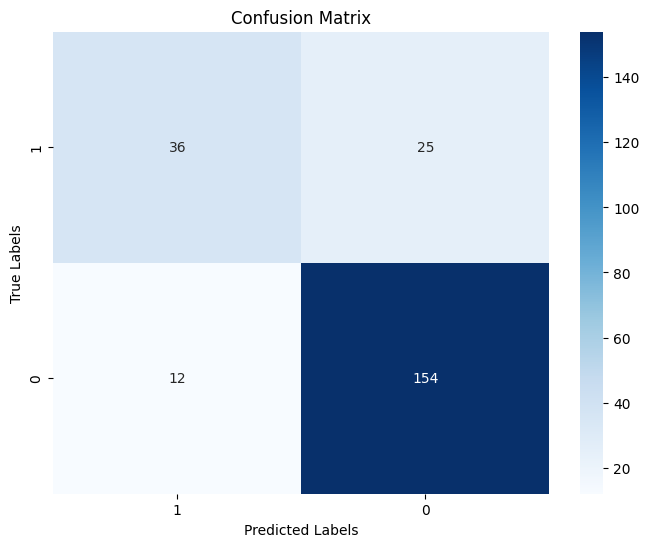

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define a filtering criterion (example: classes with more than a minimum count)
class_counts = y.value_counts()  # Count the occurrences of each class
valid_classes = class_counts[class_counts > 10].index  # Keep classes with more than 10 samples

# Filter X and y to only include rows with valid classes
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]

# Check how many classes remain after filtering
print(f"Number of valid classes: {len(valid_classes)}")
print(f"Size of X_filtered: {X_filtered.shape[0]}, Size of y_filtered: {y_filtered.shape[0]}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with more iterations
lr_model = LogisticRegression(max_iter=2000)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test_scaled)



# Evaluate the model and store accuracy in a variable
baseline_accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage

# Print accuracy
print(f"Baseline Accuracy: {baseline_accuracy:.2f}%")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_classes, yticklabels=valid_classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Best feature extraction and SDS algorithm

In [41]:
# Ensure that n_features_to_select is defined
n_features_to_select = 10  # Define a default number of features to select, or calculate based on logic

# Ensure that n_features_to_select is valid
n_total_features = X_train.shape[1]
n_features_to_select = min(n_total_features, n_features_to_select)  # Ensure no sampling errors

print(f"Number of total features: {n_total_features}, selecting {n_features_to_select}")


Number of total features: 754, selecting 10



Accuracy with Top 10 Features: 86.84%
Number of Features Used (sds_features): 10
Confusion Matrix:
[[ 24  14]
 [  6 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.89      0.95      0.92       114

    accuracy                           0.87       152
   macro avg       0.84      0.79      0.81       152
weighted avg       0.86      0.87      0.86       152


Top 10 Selected Features:
                        Feature  Importance
110        std_delta_log_energy    0.017037
124  std_delta_delta_log_energy    0.011750
11                    ddpJitter    0.010059
474        tqwt_TKEO_std_dec_11    0.007612
439       tqwt_TKEO_mean_dec_12    0.007161
118               std_7th_delta    0.007103
583        tqwt_stdValue_dec_12    0.006901
137        std_12th_delta_delta    0.006706
330          tqwt_energy_dec_11    0.006694
345          tqwt_energy_dec_26    0.006110


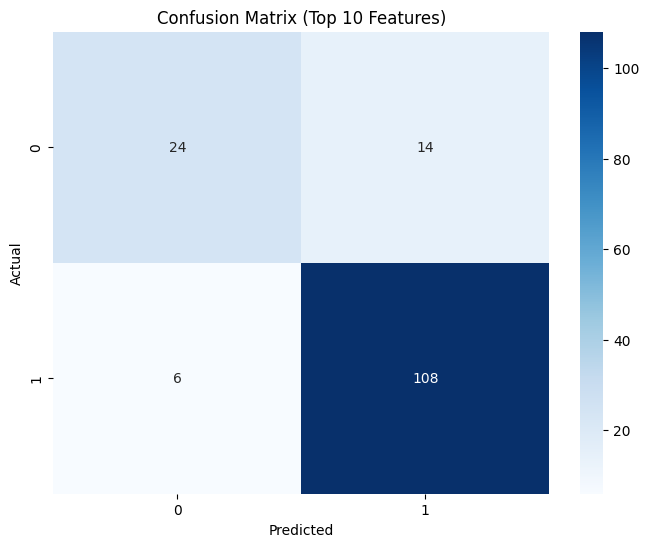

<ipython-input-42-569107aec8ba>:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




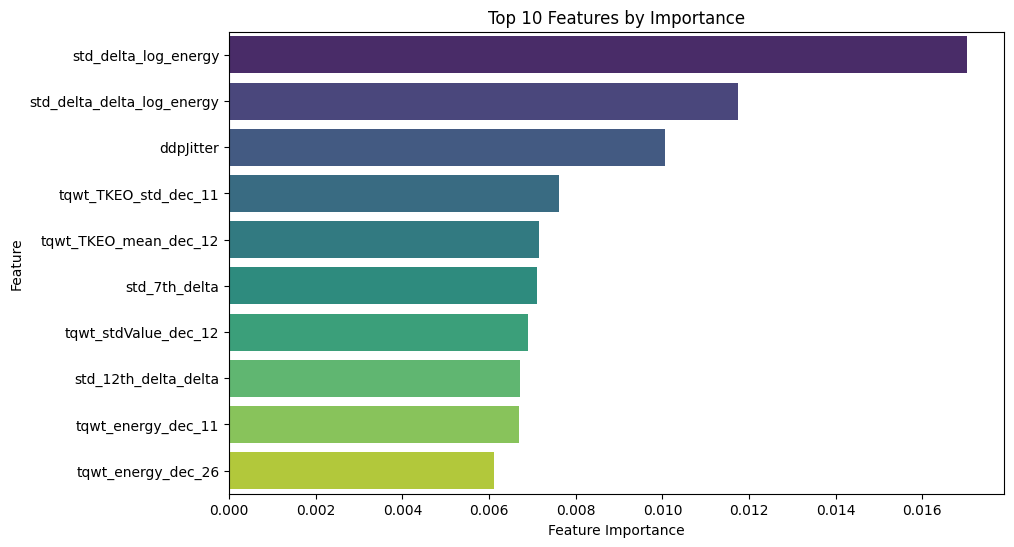

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/pd_speech_features.csv'
data = pd.read_csv(file_path)

# Preprocess the data
data.columns = data.iloc[0]  # Use the first row as column headers
data = data[1:]  # Remove the header row from the dataset
data = data.rename(columns={'class': 'target'})  # Rename target column

# Select features and the target
features = data.drop(columns=['id', 'gender', 'target'], errors='ignore')  # Drop non-feature columns
target = data['target']

# Convert features to numeric, coerce errors to handle invalid entries
features = features.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data_cleaned = features.dropna()
target_cleaned = target.loc[data_cleaned.index].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaned, target_cleaned, test_size=0.2, random_state=42
)

# Train the Random Forest classifier to get feature importance
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_features = importance_df.head(10)
top_feature_names = top_features['Feature']

# Store the number of selected features
n_total_features = len(top_feature_names)

# Use only the top 10 features for training and testing
X_train_top = X_train[top_feature_names]
X_test_top = X_test[top_feature_names]

# Train a new Random Forest classifier on the top 10 features
rf_top_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_top_model.fit(X_train_top, y_train)

# Make predictions
y_pred_top = rf_top_model.predict(X_test_top)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_top)

sds_accuracy = accuracy_score(y_test, y_pred_top) * 100  # Convert accuracy to percentage

# Print accuracy and number of features
print("\nAccuracy with Top 10 Features: {:.2f}%".format(sds_accuracy))
print(f"Number of Features Used (sds_features): {n_total_features}")

# Display results
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_top))

print("\nTop 10 Selected Features:")
print(top_features)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix (Top 10 Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title("Top 10 Features by Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get the top 10 most important features based on Random Forest feature importance
top_feature_indices = top_features.index  # Indices of the top features
best_features_sds = list(top_feature_indices)  # Ensure it's a list of indices

# Select the top features for the train and test sets
X_train_selected = X_train.iloc[:, best_features_sds]  # Use top feature indices
X_test_selected = X_test.iloc[:, best_features_sds]

# Train a new model using only the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions and evaluate on the test set
y_pred = model.predict(X_test_selected)

# Evaluation metrics
print("Selected Features Indices (SDS):", best_features_sds)
print("Accuracy (SDS selected features): {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))


Selected Features Indices (SDS): [110, 124, 11, 474, 439, 118, 583, 137, 330, 345]
Accuracy (SDS selected features): 86.84%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.89      0.95      0.92       114

    accuracy                           0.87       152
   macro avg       0.84      0.79      0.81       152
weighted avg       0.86      0.87      0.86       152



## Applying Principal Component Analysis (PCA)

In [44]:
# Load the dataset
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/pd_speech_features.csv'
data = pd.read_csv(file_path, header=1)

# Display the column names to identify the correct name for the target variable
print("Columns in dataset:", data.columns)

# After identifying the correct target column name, adjust the following lines accordingly
X = data.drop(columns=['class'])  # Adjust 'class' to the correct column name if needed
y = data['class']  # Adjust 'class' to the correct column name if needed


Columns in dataset: Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)


In [45]:
# Remove any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Now extract features and target
X = data.drop(columns=['class'])
y = data['class']


Accuracy Using PCA: 82.89%
Number of principal components selected: 169

Explained Variance by each principal component:
 [0.12945498 0.09377605 0.08241923 0.04285396 0.03563514 0.02992421
 0.02508248 0.02211802 0.02032795 0.01821969 0.01764888 0.01493275
 0.01305154 0.01271243 0.012675   0.01166227 0.01067751 0.0105697
 0.00948421 0.00934399 0.00866449 0.00805449 0.00761902 0.00738673
 0.00667549 0.00626964 0.00623053 0.00608104 0.00586315 0.00558779
 0.00526356 0.00521934 0.0049849  0.00481553 0.00469215 0.00457372
 0.00441116 0.00415405 0.0040295  0.00380608 0.00377276 0.00368792
 0.00360373 0.00350389 0.00346006 0.00341504 0.00335675 0.00314943
 0.00312678 0.00305825 0.00299024 0.00296891 0.00291581 0.00284695
 0.00283163 0.00277559 0.0027241  0.00267313 0.00258502 0.00256841
 0.00251384 0.0024909  0.00245088 0.00240598 0.00232592 0.00231459
 0.00227202 0.0022462  0.00222486 0.0022058  0.00220011 0.00212588
 0.00211183 0.00208199 0.00204935 0.00201948 0.00196505 0.00193755
 0.00192

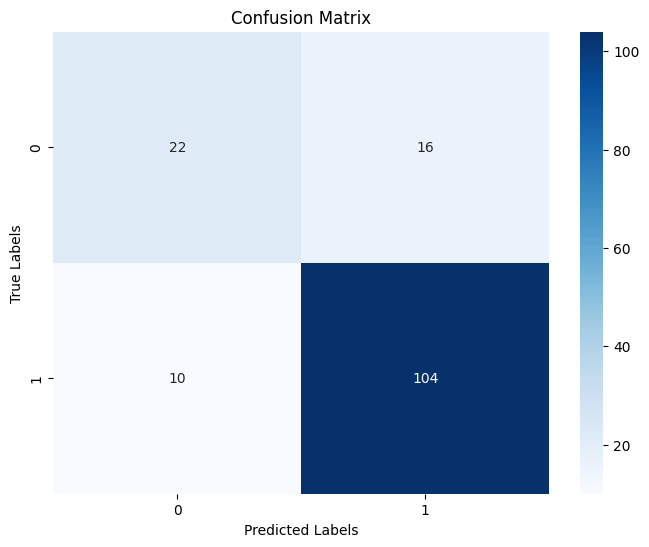

Accuracy Using PCA: 82.89%


In [46]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/pd_speech_features.csv'
data = pd.read_csv(file_path, header=1)

# Remove any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA, choosing a number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)  # Increased max_iter to prevent convergence warnings
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
PCAfinal_r2_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Using PCA: {PCAfinal_r2_score * 100:.2f}%')

# Print the number of principal components used
print(f'Number of principal components selected: {X_pca.shape[1]}')

# Optional: Check explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by each principal component:\n", explained_variance)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate accuracy and store it in a variable
PCAfinal_r2_score = accuracy_score(y_test, y_pred)
PCA_accuracy_percentage = PCAfinal_r2_score * 100  # Convert to percentage

# Print the accuracy
print(f'Accuracy Using PCA: {PCA_accuracy_percentage:.2f}%')

# Store the accuracy in a variable for later use
accuracy_pca_model = PCA_accuracy_percentage



In [47]:
# Print the number of original features
print(f'Number of original features: {X.shape[1]}')

# Print the number of principal components used after PCA
print(f'Number of features after PCA (principal components): {X_pca.shape[1]}')


Number of original features: 754
Number of features after PCA (principal components): 169


## Applying Recursive Feature Elimination (RFE)

Selected Features:
['gender', 'mean_MFCC_7th_coef', 'mean_delta_log_energy', 'std_MFCC_3rd_coef', 'std_delta_delta_log_energy', 'std_6th_delta_delta', 'std_7th_delta_delta', 'tqwt_energy_dec_15', 'tqwt_entropy_shannon_dec_27', 'tqwt_entropy_log_dec_1', 'tqwt_entropy_log_dec_7', 'tqwt_TKEO_mean_dec_18', 'tqwt_TKEO_mean_dec_21', 'tqwt_TKEO_std_dec_11', 'tqwt_stdValue_dec_9', 'tqwt_stdValue_dec_33', 'tqwt_minValue_dec_5', 'tqwt_minValue_dec_17', 'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_33']
Accuracy with selected features using RFE: 86.84%
Number of original features: 754
Number of features after RFE: 20

Confusion Matrix:
[[ 22  16]
 [  4 110]]


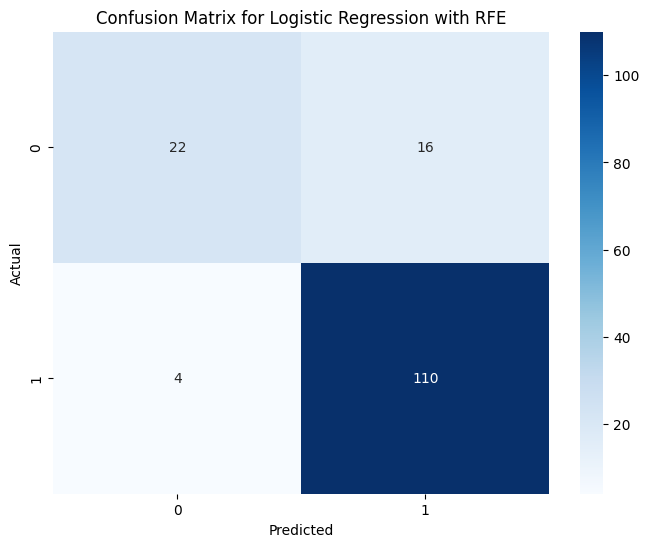


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.87      0.96      0.92       114

    accuracy                           0.87       152
   macro avg       0.86      0.77      0.80       152
weighted avg       0.87      0.87      0.86       152

Accuracy with selected features using RFE: 86.84%


In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/pd_speech_features.csv'
data = pd.read_csv(file_path, header=1)

# Remove any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000)

# Apply RFE (you can adjust the number of selected features by changing n_features_to_select)
rfe = RFE(model, n_features_to_select=20)  # Here we select the top 20 features
rfe = rfe.fit(X_train, y_train)

# Print selected features
print("Selected Features:")
selected_features = [f for i, f in enumerate(data.columns[:-1]) if rfe.support_[i]]
print(selected_features)

# Train model using the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the logistic regression model
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred = model.predict(X_test_rfe)

# Calculate accuracy
RFEfinal_r2_score = accuracy_score(y_test, y_pred)
print(f'Accuracy with selected features using RFE: {RFEfinal_r2_score * 100:.2f}%')

# Print the number of original and selected features
print(f'Number of original features: {X.shape[1]}')
print(f'Number of features after RFE: {X_train_rfe.shape[1]}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix for Logistic Regression with RFE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy and store in a variable
RFEfinal_r2_score = accuracy_score(y_test, y_pred)
RFE_accuracy_percentage = RFEfinal_r2_score * 100  # Convert to percentage

# Print the accuracy
print(f'Accuracy with selected features using RFE: {RFE_accuracy_percentage:.2f}%')

# Store the accuracy in a variable for later use
accuracy_rfe_model = RFE_accuracy_percentage



## Applying Filter Method - Mutual Information

Top 10 Features by Mutual Information:
 0
tqwt_entropy_log_dec_35        0.107912
std_delta_delta_log_energy     0.104319
mean_MFCC_2nd_coef             0.097416
std_8th_delta_delta            0.096369
tqwt_TKEO_mean_dec_16          0.095862
tqwt_entropy_shannon_dec_35    0.094599
tqwt_TKEO_std_dec_12           0.093602
tqwt_maxValue_dec_12           0.092444
tqwt_entropy_log_dec_11        0.092258
tqwt_TKEO_mean_dec_12          0.091449
dtype: float64

Accuracy with Top 20 Features (MI): 88.16%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.89      0.96      0.92       114

    accuracy                           0.88       152
   macro avg       0.87      0.80      0.83       152
weighted avg       0.88      0.88      0.88       152


Confusion Matrix:
[[ 24  14]
 [  4 110]]


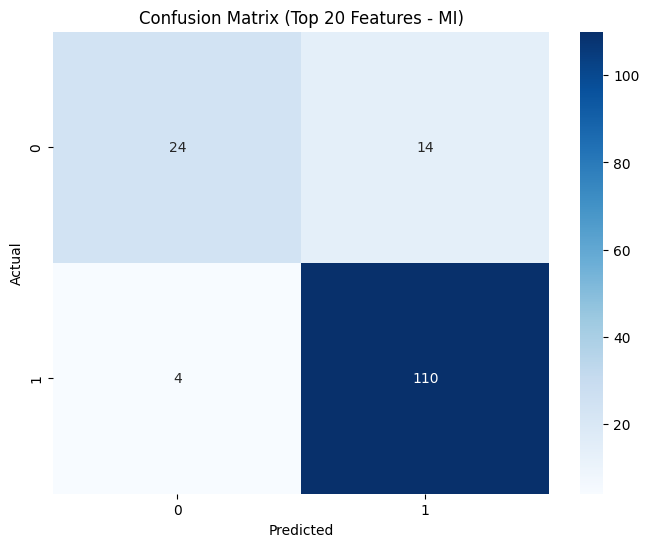

In [49]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/pd_speech_features.csv'
data = pd.read_csv(file_path)

# Preprocess the data
data.columns = data.iloc[0]  # Use the first row as column headers
data = data[1:]  # Remove the header row from the dataset
data = data.rename(columns={'class': 'target'})  # Rename target column

# Select features and the target
features = data.drop(columns=['id', 'gender', 'target'], errors='ignore')  # Drop non-feature columns
target = data['target']

# Convert features to numeric and drop rows with NaN values
features = features.apply(pd.to_numeric, errors='coerce').dropna()
target = target.loc[features.index].astype(int)

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(features, target, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=features.columns)

# Rank features by Mutual Information scores
mi_scores_sorted = mi_scores_series.sort_values(ascending=False)
print("Top 10 Features by Mutual Information:\n", mi_scores_sorted.head(10))

# Select the top N features based on MI scores
N = 20  # Select top 20 features
top_features = mi_scores_sorted.head(N).index
X_top_features = features[top_features]

# Split the dataset using selected features
X_train, X_test, y_train, y_test = train_test_split(X_top_features, target, test_size=0.2, random_state=42)

# Train and test a Random Forest classifier with selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
mi_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with Top {N} Features (MI): {mi_accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f"Confusion Matrix (Top {N} Features - MI)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Model Performance Comparison and Visualization of Models

In [50]:
# Baseline model accuracies and features
baseline_r2 = baseline_accuracy
baseline_features = X.shape[1]  # total features before any feature selection

# SDS model accuracies and features
sds_r2 = sds_accuracy  # this should be directly from the SDS output
sds_features = n_total_features  # directly from the SDS output

# RFE model accuracies and features
rfe_r2 = RFEfinal_r2_score
rfe_features = X_train_rfe.shape[1]  # from the RFECV model after fitting

# PCA model accuracies and features
pca_r2 = PCAfinal_r2_score
pca_features = X_pca.shape[1]  # number of features after applying PCA

# MI model accuracies and features
mi_accuracy_percentage = mi_accuracy * 100  # convert to percentage
mi_features = len(top_features)  # number of features selected by MI

# Compile all the data into a dictionary for easier comparison
model_performances = {
    'Baseline': {'Accuracy (%)': baseline_accuracy, 'Number of Features': baseline_features},
    'SDS': {'Accuracy (%)': sds_accuracy, 'Number of Features': sds_features},
    'PCA': {'Accuracy (%)': PCA_accuracy_percentage, 'Number of Features': pca_features},
    'RFE': {'Accuracy (%)': RFE_accuracy_percentage, 'Number of Features': rfe_features},
    'Mutual Information': {'Accuracy (%)': mi_accuracy_percentage, 'Number of Features': mi_features},
}

# Display the comparison in a formatted way
print("Model Performance Comparison:")
for model_name, metrics in model_performances.items():
    print(f"{model_name} Model: Accuracy = {metrics['Accuracy (%)']:.2f}%, Features Used = {metrics['Number of Features']}")


Model Performance Comparison:
Baseline Model: Accuracy = 83.70%, Features Used = 754
SDS Model: Accuracy = 86.84%, Features Used = 10
PCA Model: Accuracy = 82.89%, Features Used = 169
RFE Model: Accuracy = 86.84%, Features Used = 20
Mutual Information Model: Accuracy = 88.16%, Features Used = 20


In [51]:
import plotly.graph_objects as go

# Define the MI feature count (e.g., top N features selected using MI)
mi_features = len(mi_scores_sorted.head(20))

model_performances = {
    'Baseline': {'Accuracy (%)': baseline_accuracy, 'Number of Features': baseline_features},
    'SDS': {'Accuracy (%)': sds_accuracy, 'Number of Features': sds_features},
    'PCA': {'Accuracy (%)': PCA_accuracy_percentage, 'Number of Features': pca_features},
    'RFE': {'Accuracy (%)': RFE_accuracy_percentage, 'Number of Features': rfe_features},
    'MIFS': {'Accuracy (%)': mi_accuracy * 100, 'Number of Features': mi_features}  # Add MI performance
}

# Create traces
fig = go.Figure()

# Add bar chart for Accuracy
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['Accuracy (%)'] for data in model_performances.values()],
    name='Accuracy (%)',
    marker_color=["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]
))

# Add line chart for Number of Features
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    marker_color='lightblue',
    yaxis='y2'
))

# Layout adjustments
fig.update_layout(
    title="Comparison of Model Performances",
    xaxis=dict(title='Model'),
    yaxis=dict(
        title='Accuracy (%)',
        range=[0, 100]  # Set range for Accuracy in percentage
    ),
    yaxis2=dict(
        title='Number of Features',
        overlaying='y',
        side="right",
        showgrid=False  # Hide secondary grid
    ),
    legend=dict(
        x=1.03,  # Legend outside the graph
        y=1.3,
        xanchor="left",
        yanchor="top",
        bordercolor="Black",
        borderwidth=1
    ),
    template='plotly_white',  # Clean white background
    margin=dict(r=200)  # Adjust right margin for legend
)

# Show plot
fig.show()


In [52]:
import plotly.graph_objects as go


model_performances = {
    'Baseline': {'Accuracy (%)': baseline_accuracy, 'Number of Features': baseline_features},
    'SDS': {'Accuracy (%)': sds_accuracy, 'Number of Features': sds_features},
    'PCA': {'Accuracy (%)': PCA_accuracy_percentage, 'Number of Features': pca_features},
    'RFE': {'Accuracy (%)': RFE_accuracy_percentage, 'Number of Features': rfe_features}
}

# Create traces
fig = go.Figure()

# Add bar chart for Accuracy
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['Accuracy (%)'] for data in model_performances.values()],
    name='Accuracy (%)',
    marker_color='indianred'
))

# Add line chart for Number of Features
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    marker_color='lightblue',
    yaxis='y2'
))

# Layout adjustments
fig.update_layout(
    title="Comparison of Model Performances",
    xaxis=dict(title='Model'),
    yaxis=dict(
        title='Accuracy (%)',
        range=[0, 100]  # Set range for Accuracy in percentage
    ),
    yaxis2=dict(
        title='Number of Features',
        overlaying='y',
        side="right",
        showgrid=False  # Hide secondary grid
    ),
    legend=dict(
        x=1.03,  # Legend outside the graph
        y=1.3,
        xanchor="left",
        yanchor="top",
        bordercolor="Black",
        borderwidth=1
    ),
    template='plotly_white',  # Clean white background
    margin=dict(r=200)  # Adjust right margin for legend
)

# Show plot
fig.show()
